# Data preparation

Fetch details on all structures in KLIFS and filter by
- species
- DFG conformation
- resolution
- quality score
- unique kinase-PDB pairs

Save the KLIFS structure IDs for the filtered dataset.

__Note__: The KLIFS data is prepared only on the basis of the structures' metadata from KLIFS. Additional filtering will happen during fingerprint generation, where the actual structural data (coordiantes ect.) are used.

In [1]:
from opencadd.databases.klifs import setup_remote

In [2]:
SPECIES = "Human"
DFG_CONFORMATION = "in"
RESOLUTION = 4
QUALITYSCORE = 4

In [3]:
# TODO Import from kissim package!! 
ANCHOR_RESIDUES = {
    "hinge_region": [16, 47, 80],
    "dfg_region": [19, 24, 81],
    "front_pocket": [6, 48, 75]
}

## Fetch structure details

In [4]:
remote = setup_remote()

INFO:opencadd.databases.klifs.api:Set up remote session...
INFO:opencadd.databases.klifs.api:Remote session is ready!


In [5]:
structures_all = remote.structures.all_structures()

In [6]:
len(structures_all)

11451

In [7]:
structures = structures_all

In [8]:
structures.head()

,structure.id,structure.pdb,structure.alternate_model,structure.chain,species.klifs,kinase.id,kinase.name,kinase.family,kinase.group,kinase.pocket,ligand.pdb,ligand.pdb_allosteric,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath
0,10428,6buu,C,B,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,-,-,None,None,in,in,2.40,8.0,0,0,0.776,2.091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.9011,59.5948,60.8725,None
1,6763,3cqw,A,A,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,CQW,-,None,None,in,in,2.00,8.0,0,0,0.779,2.093,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.9435,58.2835,52.7742,None
2,10881,6npz,A,B,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,-,-,None,None,in,in,2.12,8.0,0,0,0.776,2.092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.9407,60.2614,66.1354,None
3,10430,6buu,A,B,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKILHTLTENRVLQNSRPFLTALKYSCFVME...,-,-,None,None,in,in,2.40,8.0,0,0,0.776,2.091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.9011,59.5948,60.8725,None
4,11746,6s9x,-,A,Human,1,AKT1,None,None,KLLGKGTFGKVILYAMKIL_________QNSRPFLTALKYSCFVME...,L1W,-,None,None,out,na,2.60,3.2,9,0,0.959,2.388,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,20.2643,67.6543,58.3549,None


## Filter structures

### Filter by species

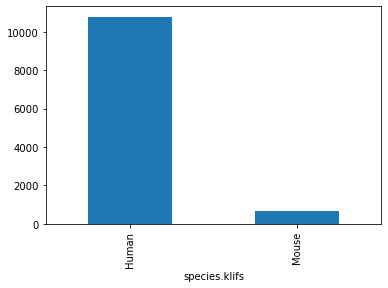

In [9]:
structures.groupby("species.klifs").size().plot(kind="bar");

In [10]:
structures = structures[structures["species.klifs"] == SPECIES]
structures.shape

(10791, 41)

### Filter by DFG conformation

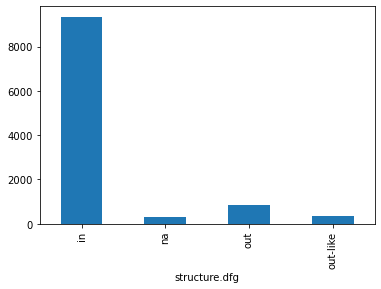

In [11]:
structures.groupby("structure.dfg").size().plot(kind="bar");

In [12]:
structures = structures[structures["structure.dfg"] == DFG_CONFORMATION]
structures.shape

(9352, 41)

### Filter by resolution

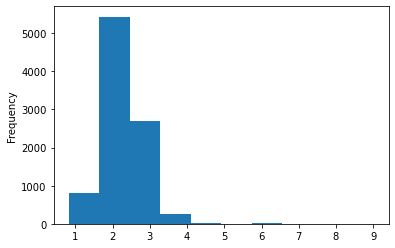

In [13]:
structures["structure.resolution"].plot(kind="hist");

In [14]:
structures = structures[structures["structure.resolution"] <= RESOLUTION]
structures.shape

(9196, 41)

### Filter by qualiy score

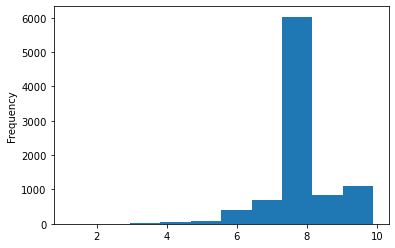

In [15]:
structures["structure.qualityscore"].plot(kind="hist");

In [16]:
structures = structures[structures["structure.qualityscore"] >= QUALITYSCORE]
structures.shape

(9178, 41)

### Filter for unique kinase-PDB pairs

Select only one entry per kinase-PDB pair by the highest quality score (if multiple entries with the same score, use first entry).

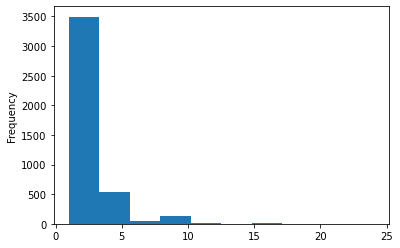

In [17]:
structures.groupby(["kinase.name", "structure.pdb"]).size().plot(kind="hist");

In [18]:
structures.sort_values(
    by=["kinase.name", "structure.pdb", "structure.qualityscore"],
    ascending=[True, True, False],
    inplace=True
)

In [19]:
structures.drop_duplicates(
    subset=["kinase.name", "structure.pdb"],
    keep="first",
    inplace=True
)
structures.reset_index(inplace=True, drop=True)

In [20]:
structures.shape

(4217, 41)

## Save filtered structures

In [21]:
#structures.to_csv("klifs_metadata_filtered.csv", index=None)

## Explore kinases

### Number of kinases

In [22]:
n_structures_per_kinase = structures.groupby("kinase.name").size()

In [23]:
print(f"Number of kinases: {len(n_structures_per_kinase)}")
print(f"Number of kinases with more than 1 structure: {len(n_structures_per_kinase[n_structures_per_kinase > 1])}")
print(f"Number of kinases with more than 10 structure: {len(n_structures_per_kinase[n_structures_per_kinase > 10])}")
print(f"Number of kinases with more than 100 structure: {len(n_structures_per_kinase[n_structures_per_kinase > 100])}")

Number of kinases: 263
Number of kinases with more than 1 structure: 196
Number of kinases with more than 10 structure: 78
Number of kinases with more than 100 structure: 8


In [24]:
n_structures_per_kinase.sort_values(ascending=False).head(30)

kinase.name
CDK2      416
CK2a1     183
PIM1      166
EGFR      156
AurA      133
CHK1      132
p38a      128
Erk2      111
p110g      96
BTK        71
GSK3B      70
TTK        68
SYK        66
PDK1       62
JAK2       62
DAPK1      55
FGFR1      55
MET        53
ALK        53
JNK3       52
BRAF       50
p110a      50
IRAK4      49
JAK1       43
DYRK1A     41
MAP2K1     41
PKACa      40
CHK2       36
EphA2      36
JAK3       36
dtype: int64

### Kinases per kinase group

In [25]:
kinase_ids = structures["kinase.id"].to_list()
kinases = remote.kinases.from_kinase_ids(kinase_ids)

In [26]:
kinases.groupby("kinase.group").size()

kinase.group
AGC         28
Atypical    11
CAMK        36
CK1         10
CMGC        39
Other       34
STE         26
TK          57
TKL         22
dtype: int64

## Explore structures

### Resolution vs. quality score

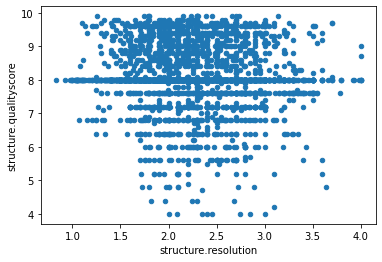

In [27]:
structures.plot(x="structure.resolution", y="structure.qualityscore", kind="scatter");

### aC-helix conformation

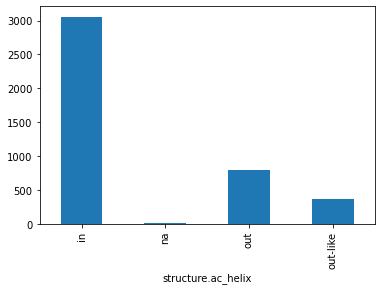

In [28]:
structures.groupby("structure.ac_helix").size().plot(kind="bar");

### Structures with/without ligands

In [29]:
structures["structure.with_ligand"] = structures["ligand.pdb"] != "-"

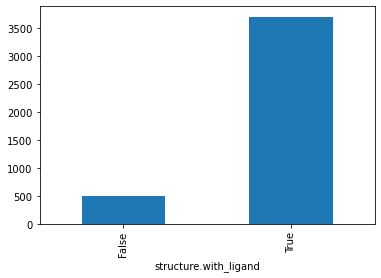

In [30]:
structures.groupby("structure.with_ligand").size().plot(kind="bar");

## Explore pockets

In [31]:
import pandas as pd

In [32]:
pockets = pd.DataFrame(structures["kinase.pocket"].apply(list).to_list(), columns=range(1, 86))
pockets.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
0,E,V,L,A,E,G,G,F,A,I,V,F,L,C,A,L,K,R,M,V,C,K,R,E,I,Q,I,M,R,D,L,S,K,N,I,V,G,Y,I,D,S,L,I,L,M,D,F,C,R,G,G,Q,V,V,N,L,M,N,Q,H,Q,C,K,T,P,I,I,H,R,D,L,K,V,E,N,I,L,L,L,C,D,F,G,S,A
1,E,V,L,A,E,G,G,F,A,I,V,F,L,C,A,L,K,R,M,V,C,K,R,E,I,Q,I,M,R,D,L,S,K,N,I,V,G,Y,I,D,S,L,I,L,M,D,F,C,R,G,G,Q,V,V,N,L,M,N,Q,H,Q,C,K,T,P,I,I,H,R,D,L,K,V,E,N,I,L,L,L,C,D,F,G,S,A
2,E,V,L,A,E,G,G,F,A,I,V,F,L,C,A,L,K,R,M,V,C,K,R,E,I,Q,I,M,R,D,L,S,K,N,I,V,G,Y,I,D,S,L,I,L,M,D,F,C,R,G,G,Q,V,V,N,L,M,N,Q,H,Q,C,K,T,P,I,I,H,R,D,L,K,V,E,N,I,L,L,L,C,D,F,G,S,A
3,H,K,L,G,G,G,Q,Y,G,E,V,Y,E,V,A,V,K,T,L,E,F,L,K,E,A,A,V,M,K,E,I,K,P,N,L,V,Q,L,L,G,V,Y,I,I,T,E,F,M,T,Y,G,N,L,L,D,Y,L,R,E,Y,L,E,K,K,N,F,I,H,R,D,L,A,A,R,N,C,L,V,V,A,D,F,G,L,S
4,H,K,L,G,G,G,Q,Y,G,E,V,Y,E,V,A,V,K,T,L,E,F,L,K,E,A,A,V,M,K,E,I,K,P,N,L,V,Q,L,L,G,V,Y,I,I,T,E,F,M,T,Y,G,N,L,L,D,Y,L,R,E,Y,L,E,K,K,N,F,I,H,R,D,L,A,A,R,N,C,L,V,V,A,D,F,G,L,S


In [33]:
klifs_colors = remote.pockets.from_structure_id(12347)["residue.klifs_color"]

### Gap rate

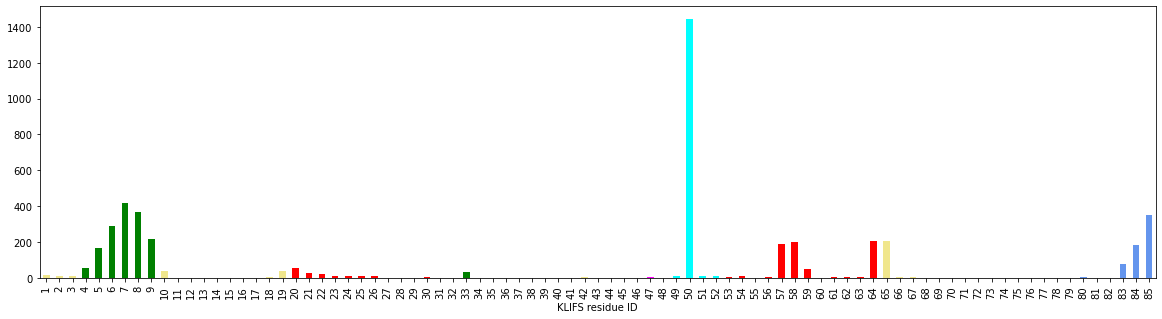

In [34]:
gaps = pockets.apply(lambda x: x == "_").sum()
gaps.plot(kind="bar", figsize=(20,5), xlabel="KLIFS residue ID", color=klifs_colors);

### Number of structures that will have no subpocket centers

... because the subpockets' anchor residues are missing (gaps in the structure).

In [35]:
ANCHOR_RESIDUES

{'hinge_region': [16, 47, 80],
 'dfg_region': [19, 24, 81],
 'front_pocket': [6, 48, 75]}

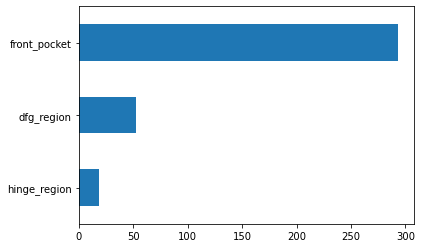

In [36]:
missing_subpockets = pd.Series({key: gaps[value].sum() for key, value in ANCHOR_RESIDUES.items()})
missing_subpockets.sort_values().plot(kind="barh");

### Modified residues

<AxesSubplot:xlabel='KLIFS residue ID'>

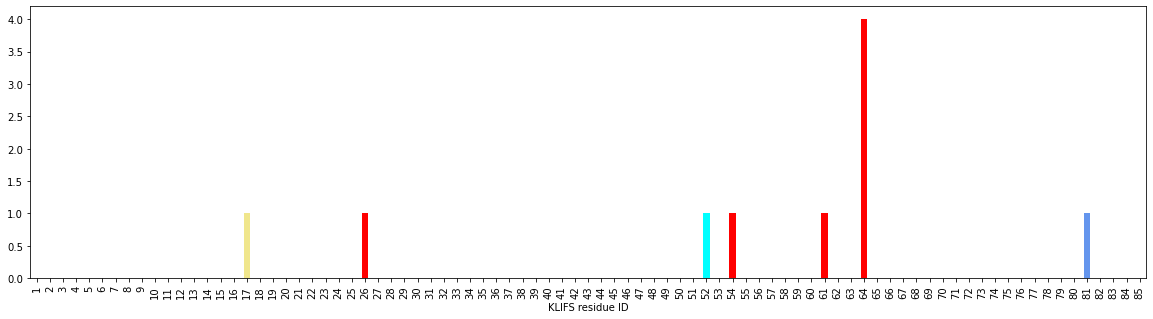

In [37]:
pockets.apply(lambda x: x == "X").sum().plot(kind="bar", figsize=(20,5), xlabel="KLIFS residue ID", color=klifs_colors)

In [38]:
structures[structures["kinase.pocket"].str.contains("X")]

,structure.id,structure.pdb,structure.alternate_model,structure.chain,species.klifs,kinase.id,kinase.name,kinase.family,kinase.group,kinase.pocket,ligand.pdb,ligand.pdb_allosteric,ligand.name,ligand.name_allosteric,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath,structure.with_ligand
198,2020,4j8m,-,A,Human,259,AurA,None,None,RPLGKGKFGNVYLLALKVLQLRREVEIQSHLRPNILRLYGYYLILE...,CJ5,-,None,None,in,out,1.85,8.0,0,0,0.837,2.069,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.3792,67.2635,45.1622,None,True
496,4389,1oir,-,A,Human,198,CDK2,None,None,EKIGEGTYGVVYKVALXKITAIREISLLKELNPNIVKLLDVYLVFE...,HDY,-,None,None,in,out,1.91,9.0,0,10,0.834,2.186,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.1404,48.0568,68.2467,None,True
993,1687,2ydj,-,B,Human,121,CHK1,None,None,QTLGEGAYGEVQLVAVKIVNIKKEIXINKMLNENVVKFYGHYLFLE...,YDJ,-,None,None,in,in,1.85,9.7,0,3,0.776,2.099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.7365,58.5181,45.0766,None,True
1611,7215,2j5e,-,A,Human,406,EGFR,None,None,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,-,-,None,None,in,in,3.10,8.0,0,0,0.777,2.109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.2436,58.9093,24.0771,None,False
2608,3450,2r9s,-,A,Human,247,JNK3,None,None,KPIGSGAQGIVCAVAIKKLRAYRELVLMKCVNKNIISLLNVYLVME...,255,-,None,None,in,in,2.40,8.0,0,0,0.850,2.207,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.7668,49.0987,28.8980,None,True
3170,2444,1yhs,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,STU,-,None,None,in,in,2.15,8.0,0,0,0.813,2.141,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.2773,53.1849,41.9412,None,True
3171,2398,1yi3,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,LY2,-,None,None,in,in,2.50,8.0,0,0,0.802,2.134,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.5558,54.2631,41.4340,None,True
3172,2403,1yi4,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,ADN,-,None,None,in,in,2.40,8.0,0,0,0.807,2.139,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.4236,53.6127,36.7024,None,True
3302,8654,5o12,-,A,Human,160,PIM1,None,None,PLLGS____SVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,1RO,-,None,None,in,in,2.40,7.6,4,8,0.803,2.006,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0000,0.0000,0.0000,None,True
3453,9156,4otp,-,A,Human,100,RIOK1,None,None,GCISTGKEANVYHRAIKIYWAEKEMRNLIRLNIPCPEPIMLVLVMS...,ADP,-,None,None,in,in,2.70,9.2,0,4,1.585,3.036,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,16.7788,52.5202,20.1106,None,True
